# IMPORTS

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATA

In [21]:
master = pd.read_csv('./outputs/output_master.csv')

In [22]:
master.head()

,Spotify URI,Voter ID,Created,Points Assigned,Comment,Round ID,Submitter,Song Title,Artist,Submitter Description
0,spotify:track:0wJw5QXDKXTYn8IVyh3wqz,sethso,2024-10-07T04:42:09Z,2,+1 added to likes\n+1 for the last 5 seconds n...,Song of the Summer,Derek Sitt,Samurai,Lupe Fiasco,Lupe Fiasco’s new album this summer was just a...
1,spotify:track:7JgNAnCjJvL8hBR1kmCOFF,sethso,2024-10-07T04:42:09Z,3,gave me a bluesy Lake Street Dive vibe and i d...,Song of the Summer,Krutarth Amin,Worth It.,RAYE,NaN
2,spotify:track:7FCfMXYTIiQ9b4hDYs4Iol,sethso,2024-10-07T04:42:09Z,0,not the one,Song of the Summer,alyssachoboy11,Be the One,Dua Lipa,OG Dua. Blasted this song in June in the car w...
3,spotify:track:73c7iqH4lCVqu4tm66i0tY,sethso,2024-10-07T04:42:09Z,1,+1 good boardgame\n+1 favorite song this round,Song of the Summer,McKenzie Sicke,Risk,Gracie Abrams,"Okay hear me out. No, this isn’t a boppy upbea..."
4,spotify:track:7221xIgOnuakPdLqT0F3nP,sethso,2024-10-07T04:42:09Z,1,+2 posty\n-1 posty in music league,Song of the Summer,Nick Ringle,I Had Some Help (Feat. Morgan Wallen),"Post Malone, Morgan Wallen",NaN


# SONG ANALYSES

In [23]:
# Five songs with most votes:
master[['Song Title', 'Points Assigned', 'Artist']].groupby(['Song Title', 'Artist']).sum().sort_values(by='Points Assigned', ascending=False).head()

,,Points Assigned
Song Title,Artist,
American Idiot,Green Day,22
Numb,Men I Trust,21
Santa Monica,Ayoni,21
Sour Candy,Melt,19
Surefire,Wilderado,19


In [24]:
# Five songs with least votes:
master[['Song Title', 'Artist', 'Points Assigned']].groupby(['Song Title', 'Artist']).sum().sort_values(by='Points Assigned').head()

,,Points Assigned
Song Title,Artist,
Eulogy,Charlie Allen,3
Power Over Me,Dermot Kennedy,4
Ten Feet Tall,"AFROJACK, Wrabel",5
CHANCES,"KAYTRANADA, Shay Lia",5
LEVII'S JEANS,"Beyoncé, Post Malone",5


# COMPETITOR ANALYSES

#### Who voted for who the most:


In [ ]:
who_most = master[['Voter ID', 'Submitter', 'Points Assigned']].groupby(['Submitter', 'Voter ID']).sum().sort_values(by='Points Assigned', ascending=False)

In [108]:
who_most.head()

,,Points Assigned
Submitter,Voter ID,
Paige Heiman,John Guiheen,16
Srujan Dadi,Emma Cummings,15
John Guiheen,Paige Heiman,15
Daniel,John Starr,14
McKenzie Sicke,Paige Heiman,14


In [112]:
alyssa = who_most.reset_index()

In [115]:
alyssa[alyssa['Voter ID'] == 'alyssachoboy11']

,Submitter,Voter ID,Points Assigned
25,John Guiheen,alyssachoboy11,10
26,McKenzie Sicke,alyssachoboy11,10
29,Srujan Dadi,alyssachoboy11,10
49,Paige Heiman,alyssachoboy11,9
61,John Starr,alyssachoboy11,8
64,mkat254,alyssachoboy11,8
70,Daniel,alyssachoboy11,8
99,Nate Riek,alyssachoboy11,6
113,sethso,alyssachoboy11,6
116,Emma Cummings,alyssachoboy11,5


In [31]:
who_most.tail(15)

Points Assigned
Submitter      Voter ID                       
mkat254        Derek Sitt                    2
McKenzie Sicke sethso                        2
Nate Riek      Derek Sitt                    2
Krutarth Amin  Srujan Dadi                   1
               Nate Riek                     1
               alyssachoboy11                1
               Daniel                        1
John Starr     Srujan Dadi                   1
McKenzie Sicke Derek Sitt                    1
Derek Sitt     mkat254                       1
Krutarth Amin  Paige Heiman                  1
               mkat254                       0
John Starr     John Starr                    0
McKenzie Sicke McKenzie Sicke                0
Nick Ringle    Nick Ringle                   0

#### Commenter Stats

In [38]:
comments = master[['Submitter', 'Submitter Description']].fillna('')

In [41]:
comments['length'] = comments['Submitter Description'].apply(lambda x: len(x))

In [46]:
comments.groupby('Submitter').mean(numeric_only=True).sort_values(by='length', ascending=False)

,length
Submitter,
Srujan Dadi,241.843373
Derek Sitt,231.758065
John Starr,188.090909
alyssachoboy11,174.525000
McKenzie Sicke,169.506494
John Guiheen,163.684211
sethso,145.283019
Paige Heiman,141.111111
Nate Riek,138.208333


#### Vote Comment Stats

In [50]:
voter_comments = master[['Voter ID', 'Comment']].fillna('')

In [52]:
voter_comments['length'] = voter_comments['Comment'].apply(lambda x: len(x))

In [54]:
voter_comments.groupby('Voter ID').mean(numeric_only=True).sort_values(by='length', ascending=False)

,length
Voter ID,
John Starr,80.500000
mkat254,65.885417
McKenzie Sicke,61.051282
Srujan Dadi,60.365854
alyssachoboy11,46.043011
Nate Riek,42.887640
Daniel,42.081967
Derek Sitt,38.538462
Paige Heiman,38.014706


#### Average distribution

In [65]:
vote_distribution = master[['Voter ID', 'Points Assigned']].groupby('Voter ID').mean().sort_values(by='Points Assigned', ascending=False)

In [66]:
vote_distribution

,Points Assigned
Voter ID,
Emma Cummings,2.375000
Paige Heiman,1.397059
Alex Cheng,1.376812
Nick Ringle,1.376812
Derek Sitt,1.365385
Daniel,1.360656
John Guiheen,1.283784
sethso,1.183333
Srujan Dadi,1.158537


### Average distribution by week?

In [93]:
vote_distribution_by_week = master[['Voter ID', 'Round ID', 'Points Assigned']].groupby(['Voter ID', 'Round ID']).mean().reset_index()

In [94]:
vote_distribution_by_week

,Voter ID,Round ID,Points Assigned
0,Alex Cheng,Concert Hits,1.090909
1,Alex Cheng,"Fight the Power, Man!",1.333333
2,Alex Cheng,Floor Time,1.500000
3,Alex Cheng,Good Riddance,1.500000
4,Alex Cheng,Main Character Energy,1.714286
...,...,...,...
101,sethso,"Fight the Power, Man!",1.000000
102,sethso,Main Character Energy,1.000000
103,sethso,Our C-A-M-P-F-I-R-E S-O-N-G song!,3.000000
104,sethso,Song of the Summer,0.846154


In [95]:
# Get week num from round ID:
rounds = pd.read_csv('data/rounds.csv')

In [96]:
rounds.head()

,ID,Created,Name,Description,Playlist URL
0,2be216f7413f4f7bae842351b9ab7fd3,2024-09-30T02:40:40Z,Song of the Summer,Welcome back to MUSIC LEAGUE SEASON 2! In hono...,https://open.spotify.com/playlist/6sOJnnwuSAfi...
1,441efd1651f94821b2ac81657b402b03,2024-09-30T02:40:40Z,Our C-A-M-P-F-I-R-E S-O-N-G song!,Let’s gather round the campfire and sing our c...,https://open.spotify.com/playlist/6TnrG5VK0uFA...
2,7c42c72b23004b158cca704083f7a6d9,2024-09-30T02:40:40Z,"Fight the Power, Man!",Kamala vs Trump SHOWDOWN - in honor of electio...,https://open.spotify.com/playlist/7o44VvbvXrRC...
3,06d2fb9829774bf496984237e46cf940,2024-09-30T02:40:40Z,Concert Hits,"Whether it was an artist you never heard of, o...",https://open.spotify.com/playlist/4VrLLrNijD7c...
4,fd5f5ae2737346b0aad5149aab97f809,2024-09-30T02:40:41Z,Main Character Energy,Your walk up song. Your warm up song before pu...,https://open.spotify.com/playlist/5n7qaWFeog1V...


In [97]:
week_nums = []
for i in range(len(rounds)):
    week_nums.append(i+1)

In [98]:
rounds['week'] = week_nums

In [99]:
rounds_dict = dict(zip(rounds['Name'], rounds['week']))

In [100]:
vote_distribution_by_week['Round ID'] = vote_distribution_by_week['Round ID'].apply(lambda x: rounds_dict[x])

In [103]:
vote_distribution_by_week.head(18)

,Voter ID,Round ID,Points Assigned
0,Alex Cheng,4,1.090909
1,Alex Cheng,3,1.333333
2,Alex Cheng,8,1.500000
3,Alex Cheng,7,1.500000
4,Alex Cheng,5,1.714286
5,Alex Cheng,2,1.333333
6,Alex Cheng,1,1.100000
7,Alex Cheng,6,1.714286
8,Daniel,4,1.333333
9,Daniel,3,1.500000


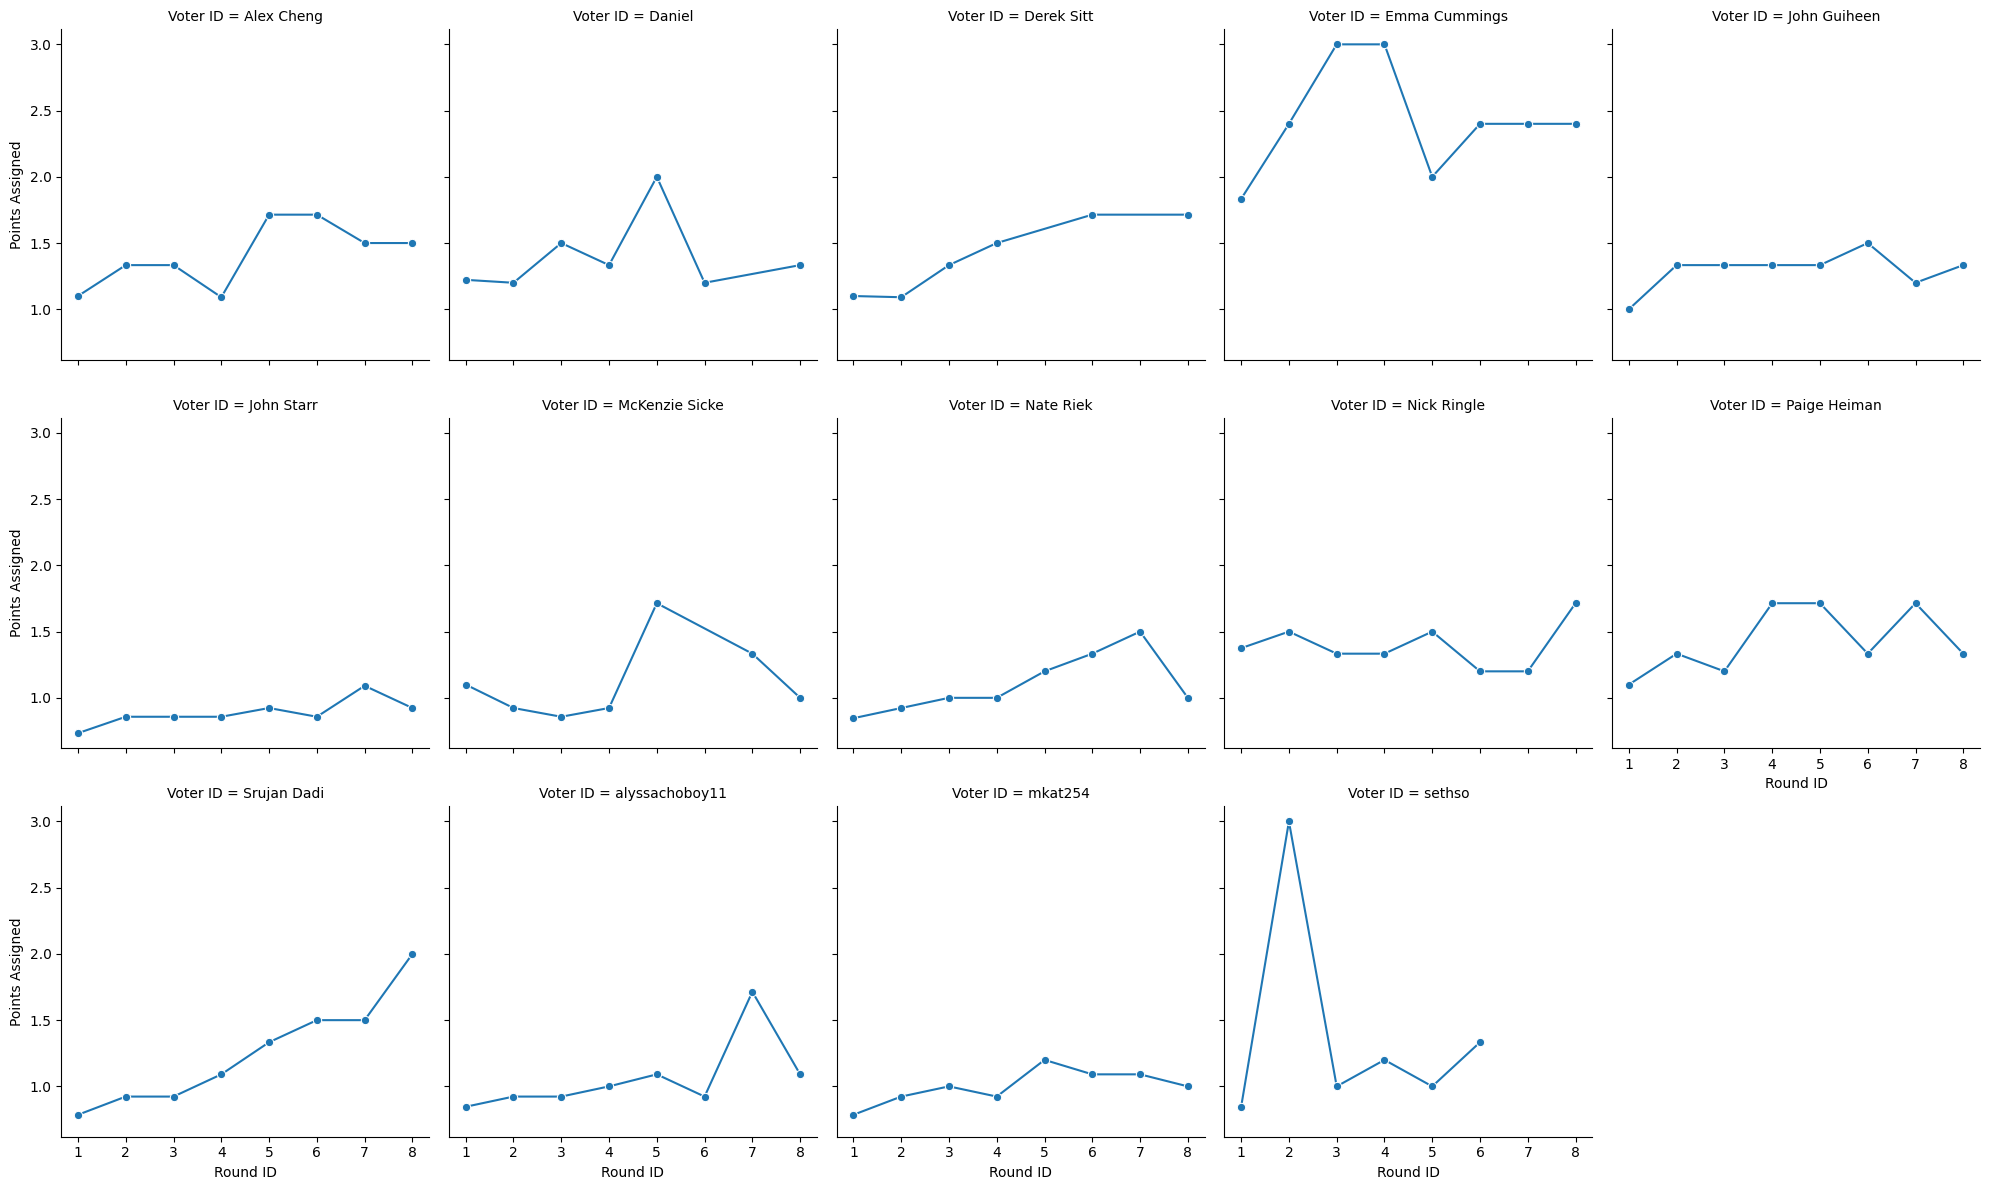

In [105]:
g = sns.FacetGrid(vote_distribution_by_week, col='Voter ID', col_wrap=5, height=4, sharey=True)
    
# Map the seaborn lineplot function to each subplot
g.map(sns.lineplot, 'Round ID', 'Points Assigned', marker='o')